In [2]:
import os
import pretty_midi
import numpy as np
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Preprocessing

In [4]:
# LSTM model for music composer prediction all_midi_data files
# Importing the required libraries


# Path to the directory containing MIDI files
base_dir = './Composer_Dataset/NN_midi_files_extended/train'

# List of folders (composers) within the base directory
composer_folders = os.listdir(base_dir)

# Initialize a list to store all loaded MIDI data
all_midi_data = []

# Loop through each composer folder
for composer_folder in composer_folders:
    composer_path = os.path.join(base_dir, composer_folder)
    
    # Check if the item in the base directory is a folder
    if os.path.isdir(composer_path):
        print(f"Loading MIDI files from {composer_folder}...")
        
        # Loop through each MIDI file in the composer folder
        for file_name in os.listdir(composer_path):
            file_path = os.path.join(composer_path, file_name)
            
            # Check if the item in the composer folder is a file and has a .mid or .midi extension
            if os.path.isfile(file_path) and (file_name.endswith('.mid')):
                midi_data = pretty_midi.PrettyMIDI(file_path)
                all_midi_data.append({
                    'composer': composer_folder,
                    'file_name': file_name,
                    'midi_data': midi_data
                })
                print(f"  Loaded: {file_name}")

print("All MIDI files loaded successfully!")

# Extracting features from MIDI files

# Define a function to extract features from a MIDI file
def extract_features(midi_data):
    # Initialize an empty list to store the features
    features = []
    
    # Extract tempo from the MIDI file
    tempo = midi_data.estimate_tempo()
    features.append(tempo)
    
    # Extract time signature changes from the MIDI file
    time_signature_changes = midi_data.time_signature_changes
    num_time_signature_changes = len(time_signature_changes)
    features.append(num_time_signature_changes)
    
    # Extract key signature changes from the MIDI file
    key_signature_changes = midi_data.key_signature_changes
    num_key_signature_changes = len(key_signature_changes)
    features.append(num_key_signature_changes)
    
    # Extract time signature changes from the MIDI file
    time_signature_changes = midi_data.time_signature_changes
    num_time_signature_changes = len(time_signature_changes)
    features.append(num_time_signature_changes)
    
    # Extract the total number of notes in the MIDI file
    total_notes = sum([len(instrument.notes) for instrument in midi_data.instruments])
    features.append(total_notes)
    
    return features

# Extract features from all MIDI files
all_features = []
all_labels = []

for item in all_midi_data:
    composer = item['composer']
    midi_data = item['midi_data']
    
    # Extract features from the MIDI data
    features = extract_features(midi_data)
    
    # Append the features and labels to the respective lists
    all_features.append(features)
    all_labels.append(composer)

# Convert the features and labels to NumPy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the features
X_train_normalized = X_train / np.max(X_train)
X_val_normalized = X_val / np.max(X_train)

# Reshape the features for the LSTM model
X_train_reshaped = X_train_normalized.reshape((X_train_normalized.shape[0], X_train_normalized.shape[1], 1))


Loading MIDI files from bach...
  Loaded: bach342.mid
  Loaded: bach343.mid
  Loaded: bach345.mid
  Loaded: bach346.mid
  Loaded: bach347.mid
  Loaded: bach350.mid
  Loaded: bach351.mid
  Loaded: bach352.mid
  Loaded: bach353.mid
  Loaded: bach355.mid
  Loaded: bach357.mid
  Loaded: bach358.mid
  Loaded: bach360.mid
  Loaded: bach361.mid
  Loaded: bach362.mid
  Loaded: bach363.mid
  Loaded: bach364.mid
  Loaded: bach365.mid
  Loaded: bach366.mid
  Loaded: bach367.mid
  Loaded: bach368.mid
  Loaded: bach369.mid
  Loaded: bach370.mid
  Loaded: bach371.mid
  Loaded: bach372.mid
  Loaded: bach373.mid
  Loaded: bach374.mid
  Loaded: bach375.mid
  Loaded: bach377.mid
  Loaded: bach378.mid
  Loaded: bach379.mid
  Loaded: bach380.mid
  Loaded: bach381.mid
  Loaded: bach382.mid
  Loaded: bach383.mid
  Loaded: bach385.mid
  Loaded: bach386.mid
  Loaded: bach387.mid
  Loaded: bach388.mid
  Loaded: bach389.mid
  Loaded: bach390.mid
  Loaded: bach391.mid
Loading MIDI files from bartok...
  Loaded: 

C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


  Loaded: chopin051.mid
  Loaded: chopin052.mid
  Loaded: chopin054.mid
  Loaded: chopin055.mid
  Loaded: chopin056.mid
  Loaded: chopin057.mid
  Loaded: chopin058.mid
  Loaded: chopin059.mid
  Loaded: chopin060.mid
  Loaded: chopin063.mid
  Loaded: chopin064.mid
  Loaded: chopin065.mid
  Loaded: chopin067.mid
  Loaded: chopin068.mid
  Loaded: chopin071.mid
  Loaded: chopin072.mid
  Loaded: chopin073.mid
  Loaded: chopin074.mid
  Loaded: chopin075.mid
  Loaded: chopin076.mid
  Loaded: chopin077.mid
  Loaded: chopin079.mid
  Loaded: chopin080.mid
  Loaded: chopin081.mid
  Loaded: chopin082.mid
  Loaded: chopin083.mid
  Loaded: chopin084.mid
  Loaded: chopin085.mid
  Loaded: chopin088.mid
  Loaded: chopin089.mid
  Loaded: chopin090.mid
  Loaded: chopin091.mid
  Loaded: chopin092.mid
  Loaded: chopin093.mid
  Loaded: chopin094.mid
  Loaded: chopin095.mid
  Loaded: chopin096.mid
  Loaded: chopin097.mid
  Loaded: chopin098.mid
Loading MIDI files from handel...
  Loaded: handel099.mid
  Load

 LSTM model

In [6]:
# Model definition
model = Sequential([
    LSTM(1024, input_shape=(X_train_normalized.shape[1], 1)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_val_normalized.reshape((X_val_normalized.shape[0], X_val_normalized.shape[1], 1)), y_val)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.1083 - loss: 2.1974 - val_accuracy: 0.0678 - val_loss: 2.1999
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.1624 - loss: 2.1930 - val_accuracy: 0.0847 - val_loss: 2.2031
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1341 - loss: 2.1902 - val_accuracy: 0.0847 - val_loss: 2.2011
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.1320 - loss: 2.1802 - val_accuracy: 0.1356 - val_loss: 2.2062
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.1579 - loss: 2.1706 - val_accuracy: 0.1695 - val_loss: 2.1995
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 0.1635 - loss: 2.1565 - val_accuracy: 0.1186 - val_loss: 2.2007
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step - accuracy: 0.1824 - loss: 2.1386 - val_accuracy: 0.0847 - val_loss: 2.1676
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 560ms/step - accuracy: 0.1639 - loss: 2.1314 - val_accuracy: 0.1525 - v

In [7]:
# Make predictions on the validation set
predictions = model.predict(X_val_normalized.reshape((X_val_normalized.shape[0], X_val_normalized.shape[1], 1)))

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the encoded labels back to the original labels
predicted_composers = label_encoder.inverse_transform(predicted_labels)

# Display some of the predictions

for i in range(10):
    print(f"Predicted Composer: {predicted_composers[i]}")
    print(f"Actual Composer: {label_encoder.inverse_transform([y_val[i]])[0]}")
    print()



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
Predicted Composer: mozart
Actual Composer: mozart

Predicted Composer: bach
Actual Composer: bach

Predicted Composer: bach
Actual Composer: bach

Predicted Composer: bach
Actual Composer: schumann

Predicted Composer: bach
Actual Composer: bartok

Predicted Composer: handel
Actual Composer: hummel

Predicted Composer: chopin
Actual Composer: bartok

Predicted Composer: bach
Actual Composer: byrd

Predicted Composer: mozart
Actual Composer: mozart

Predicted Composer: chopin
Actual Composer: chopin



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


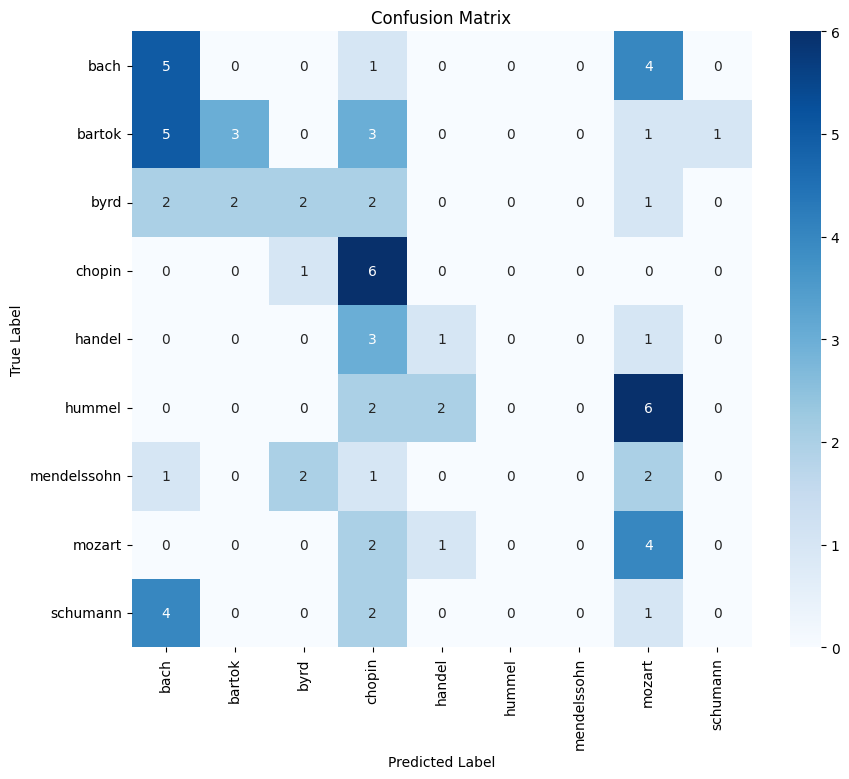

In [11]:
# Confusion matrix
predictions = model.predict(X_val_normalized.reshape((X_val_normalized.shape[0], X_val_normalized.shape[1], 1)))

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)


cm = confusion_matrix(y_val, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.title('Confusion Matrix')

plt.show()


In [12]:
# Classification report
report = classification_report(y_val, predicted_labels, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

        bach       0.29      0.50      0.37        10
      bartok       0.60      0.23      0.33        13
        byrd       0.40      0.22      0.29         9
      chopin       0.27      0.86      0.41         7
      handel       0.25      0.20      0.22         5
      hummel       0.00      0.00      0.00        10
 mendelssohn       0.00      0.00      0.00         6
      mozart       0.20      0.57      0.30         7
    schumann       0.00      0.00      0.00         7

    accuracy                           0.28        74
   macro avg       0.22      0.29      0.21        74
weighted avg       0.26      0.28      0.23        74



C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jegullin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_cla

# Conclusion

Based on the above results, the LSTM model achieved an accuracy of 28% on the validation set. The confusion matrix and classification report provide insights into the model's performance for each composer class. The model's performance varies across different composers, with some classes having higher precision and recall scores than others.
The recall score for the "bach" class is 50%, indicating that the model correctly identified 50% of the "bach" compositions in the validation set. However, the precision score for the "bach" class is 29%, indicating that only 29% of the predicted "bach" compositions were correct.
The f1-score provides a balance between precision and recall, with the "bach" class having an f1-score of 37%. The overall accuracy of the model is 28%, indicating that the model correctly predicted the composer for 28% of the compositions in the validation set.
The support column in the classification report indicates the number of samples for each class in the validation set. The model's performance varies across different classes, with some classes having higher support than others.
for the support class of bach is 10 which means that there are 10 samples of bach in the validation set etc for other classes.